#Zadanie 7 (7 pkt)
Celem zadania jest zaimplementowanie dwóch wersji naiwnego klasyfikatora Bayesa.
* W pierwszej wersji należy dokonać dyskretyzacji danych - przedział wartości każdego atrybutu dzielimy na cztery równe przedziały i każdej ciągłej wartości atrybutu przypisujemy wartość dyskretną wynikająca z przynależności do danego przedziału.
* W drugiej wersji wartości likelihood wyliczamy z rozkładów normalnych o średnich i odchyleniach standardowych wynikających z wartości atrybutów.
Trening i test należy przeprowadzić dla zbioru Iris, tak jak w przypadku zadania z drzewem klasyfikacyjnym. Proszę przeprowadzić eksperymenty najpierw dla DOKŁADNIE takiego podziału zbioru testowego i treningowego jak umieszczony poniżej. W dalszej części należy przeprowadzić analizę działania klasyfikatorów dla różnych wartości parametrów. Proszę korzystać z przygotowanego szkieletu programu, oczywiście można go modyfikować według potrzeb. Wszelkie elementy szkieletu zostaną wyjaśnione na zajęciach.

* Dyskretyzacja danych - **0.5 pkt**
* Implementacja funkcji rozkładu normalnego o zadanej średniej i odchyleniu standardowym. - **0.5 pkt**
* Implementacja naiwnego klasyfikatora Bayesa dla danych dyskretnych. - **2.0 pkt**
* Implementacja naiwnego klasyfikatora Bayesa dla danych ciągłych. - **2.5 pkt**
* Przeprowadzenie eksperymentów, wnioski i sposób ich prezentacji. - **1.5 pkt**

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import math
from collections import Counter
import numpy as np

iris = load_iris()

x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=123)

In [4]:

from collections import Counter
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from cf_matrix import make_confusion_matrix



class NaiveBayes:
    def __init__(self):
        self.priors = {}
        self.likelihoods = {}

    def build_classifier(self, train_features, train_classes):
        classes = set(train_classes)
        for cls in classes:
            cls_features = train_features[train_classes == cls]
            self.priors[cls] = len(cls_features) / len(train_features)
            self.likelihoods[cls] = self.data_discretization(cls_features)

    @staticmethod
    def data_discretization(data):
        bins = np.percentile(data, [25, 50, 75, 100], axis=0)
        discretized_data = np.array(
            [np.digitize(data_i, bins_i) for data_i, bins_i in zip(data.T, bins.T)]
        )
        feature_counts = [Counter(feat) for feat in discretized_data]
        return feature_counts

    def predict(self, sample):
        bins = np.percentile(sample, [25, 50, 75, 100], axis=0)
        discretized_sample = np.digitize(sample, bins)
        class_probs = {}
        for cls, class_likelihoods in self.likelihoods.items():
            class_prob = self.priors[cls]
            for feature_index, feature_value in enumerate(discretized_sample):
                feature_likelihood = class_likelihoods[feature_index].get(
                    feature_value, 1e-6
                )
                class_prob *= feature_likelihood
            class_probs[cls] = class_prob
        return max(class_probs, key=class_probs.get)


class GaussianNaiveBayes:
    def __init__(self):
        self.priors = {}
        self.mean_std = {}

    def build_classifier(self, train_features, train_classes):
        classes = set(train_classes)
        for cls in classes:
            cls_features = train_features[train_classes == cls]

            self.priors[cls] = len(cls_features) / len(train_features)
            self.mean_std[cls] = [(f.mean(), f.std()) for f in cls_features.T]

    @staticmethod
    def normal_dist(x, mean, std):
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(
            -((x - mean) ** 2 / (2 * std**2))
        )

    def predict(self, sample):
        class_probs = {}
        for cls, features in self.mean_std.items():
            class_prob = self.priors[cls]
            for feature_index, (mean, std) in enumerate(features):
                class_prob *= self.normal_dist(sample[feature_index], mean, std)
            class_probs[cls] = class_prob
        return max(class_probs, key=class_probs.get)


# Test z seedem 123

In [5]:
iris = load_iris()

x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=123
)

nb = NaiveBayes()
nb.build_classifier(x_train, y_train)

gnb = GaussianNaiveBayes()
gnb.build_classifier(x_train, y_train)

nb_correct = 0
gnb_correct = 0

for sample, target in zip(x_test, y_test):
    nb_prediction = nb.predict(sample)
    gnb_prediction = gnb.predict(sample)
    if nb_prediction == target:
        nb_correct += 1
    if gnb_prediction == target:
        gnb_correct += 1

print("test count:", len(x_test))
print("Naive Bayes correct:", nb_correct)
print("Naive Gaussian correct:", gnb_correct)

print("Naive Bayes Prediction accuracy:", nb_correct / len(x_test))
print("Gaussian Naive Bayes Prediction accuracy:", gnb_correct / len(x_test))

test count: 15
Naive Bayes correct: 5
Naive Gaussian correct: 15
Naive Bayes Prediction accuracy: 0.3333333333333333
Gaussian Naive Bayes Prediction accuracy: 1.0


# Naive Baysian Classifier


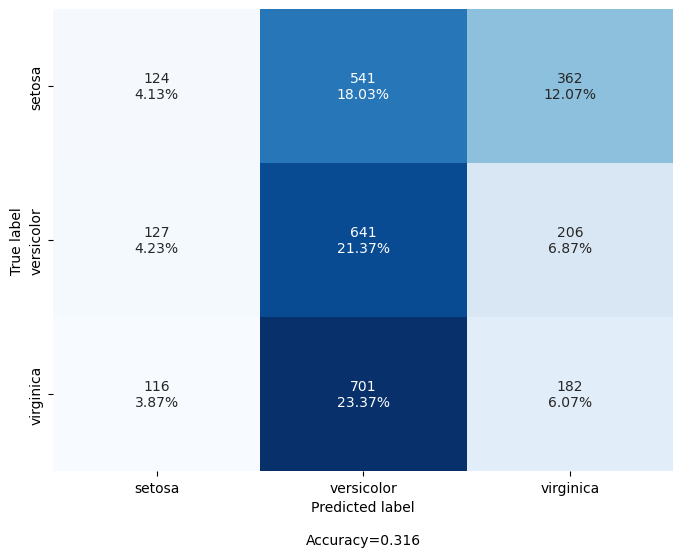

In [10]:
iris = load_iris()

x = iris.data
y = iris.target

target_labels = iris.target_names

nb_y_pred = []
Y_test = []

for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
    Y_test += y_test.tolist()
    nb = NaiveBayes()
    nb.build_classifier(x_train, y_train)
    for sample, target in zip(x_test, y_test):
        nb_y_pred.append(nb.predict(sample))


nb_cf_matrix = confusion_matrix(Y_test, nb_y_pred)
make_confusion_matrix(nb_cf_matrix, figsize=(8, 6), cbar=False, categories=target_labels)

## Gaussian Naive Bayesian Classifier

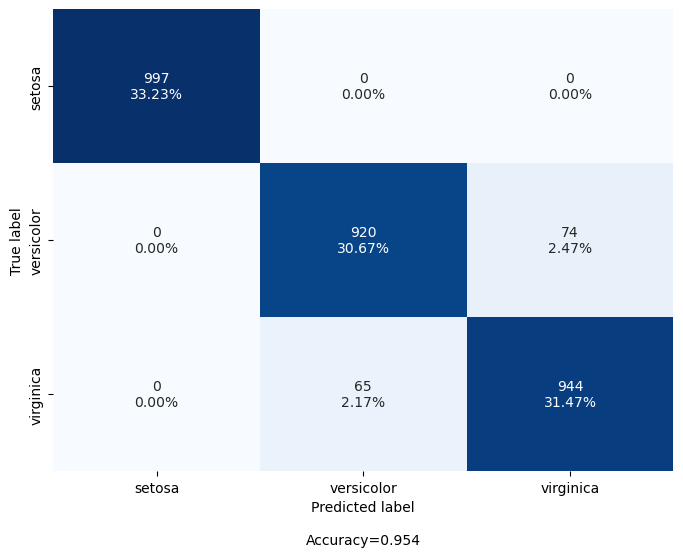

In [9]:
iris = load_iris()

x = iris.data
y = iris.target


gnb_y_pred = []
Y_test = []

for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
    Y_test += y_test.tolist()

    gnb = GaussianNaiveBayes()
    gnb.build_classifier(x_train, y_train)

    for sample, target in zip(x_test, y_test):
        gnb_y_pred.append(gnb.predict(sample))


gnb_cf_matrix = confusion_matrix(Y_test, gnb_y_pred)
make_confusion_matrix(
    gnb_cf_matrix, figsize=(8, 6), cbar=False, categories=iris.target_names
)